In [1]:
import tarfile
import netCDF4 as nc
from netCDF4 import Dataset
import os


# Define the path to the tar.gz file and the extraction directory
tar_gz_path = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\example_output.tar.gz"
extraction_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)"

In [3]:
# Directory containing the NetCDF files
data_surface_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL"
data_routing_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\ROUTING"

In [5]:
import os
import xarray as xr
# Function to recursively find all .nc files in a directory
def find_nc_files(directory):
    nc_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nc'):
                nc_files.append(os.path.join(root, file))
    return nc_files

In [11]:
# Find all .nc files in each directory
surface_files = find_nc_files(data_surface_dir)
routing_files = find_nc_files(data_routing_dir)

# Check if files were found
print(f'Found {len(surface_files)} files in surfacemodel')
print(f'Found {len(routing_files)} files in routing')

# Load datasets
ds_surface = xr.open_mfdataset(surface_files, combine='by_coords')
ds_routing = xr.open_mfdataset(routing_files, combine='by_coords')

Found 15339 files in surfacemodel
Found 5113 files in routing


In [24]:
print(ds_surface)

<xarray.Dataset>
Dimensions:          (time: 5113, north_south: 36, east_west: 34,
                      SoilMoist_profiles: 4)
Coordinates:
  * time             (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2024-01-01
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables:
    lat              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    lon              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    SoilMoist_tavg   (time, SoilMoist_profiles, north_south, east_west) float32 dask.array<chunksize=(1, 4, 36, 34), meta=np.ndarray>
    TWS_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    Streamflow_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNE

In [56]:
print(ds_routing)

<xarray.Dataset>
Dimensions:          (time: 5113, north_south: 36, east_west: 34)
Coordinates:
  * time             (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2024-01-01
Dimensions without coordinates: north_south, east_west
Data variables:
    lat              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    lon              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    Streamflow_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         1
    SOIL_LAYER_THICKNESSES:  1.0
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  model_not_specified
    ...                      ...
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
  

In [13]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Combine datasets
combined_data = xr.merge([ds_surface, ds_routing])

In [15]:
combined_data

<xarray.Dataset>
Dimensions:          (time: 5113, north_south: 36, east_west: 34,
                      SoilMoist_profiles: 4)
Coordinates:
  * time             (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2024-01-01
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables:
    lat              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    lon              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    SoilMoist_tavg   (time, SoilMoist_profiles, north_south, east_west) float32 dask.array<chunksize=(1, 4, 36, 34), meta=np.ndarray>
    TWS_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    Streamflow_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [0.1 0.3 0.6 1. ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  +template open water
    ...                      ...
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   11.875
    SOUTH_WEST_CORNER_LON:   97.375
    DX:                      0.25
    DY:                      0.25

In [17]:
# Select variables and time range
variables_of_interest = ["SoilMoist_tavg", "TWS_tavg", "Streamflow_tavg"]
time_start = pd.to_datetime("2010-01-01")
time_end = pd.to_datetime("2024-01-01")

In [19]:
filtered_data = combined_data[variables_of_interest].sel(time=slice(time_start, time_end))

In [21]:
filtered_data.head()

<xarray.Dataset>
Dimensions:          (time: 5, SoilMoist_profiles: 4, north_south: 5,
                      east_west: 5)
Coordinates:
  * time             (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2010-01-06
Dimensions without coordinates: SoilMoist_profiles, north_south, east_west
Data variables:
    SoilMoist_tavg   (time, SoilMoist_profiles, north_south, east_west) float32 dask.array<chunksize=(1, 4, 5, 5), meta=np.ndarray>
    TWS_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 5, 5), meta=np.ndarray>
    Streamflow_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 5, 5), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [0.1 0.3 0.6 1. ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  +template open water
    ...                      ...
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   11.875
    SOUTH_WEST_CORNER_LON:   97.375
    DX:                      0.25
    DY:                      0.25

In [25]:
# Extract the soil moisture data
soil_moisture = ds_surface['SoilMoist_tavg']
# Calculate the average soil moisture over time and plot it
soil_moisture_time_avg = soil_moisture.mean(dim=['SoilMoist_profiles', 'north_south', 'east_west'])

In [35]:
soil_moisture_time_avg

<xarray.DataArray 'SoilMoist_tavg' (time: 5113)>
dask.array<mean_agg-aggregate, shape=(5113,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2024-01-01

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Extract latitude, longitude, and soil moisture values from ds_surface
latitude = ds_surface['lat'].values
longitude = ds_surface['lon'].values

In [69]:
longitude.shape

(5113, 36, 34)

In [149]:
# ***Extract the soil moisture data***
soil_moisture = ds_surface['SoilMoist_tavg']
soil_moisture_avg = ds_surface['SoilMoist_tavg'].mean(axis=0).values  # Average over all layers

<xarray.DataArray 'SoilMoist_tavg' (time: 5113, SoilMoist_profiles: 4,
                                    north_south: 36, east_west: 34)>
dask.array<concatenate, shape=(5113, 4, 36, 34), dtype=float32, chunksize=(1, 4, 36, 34), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2024-01-01
Dimensions without coordinates: SoilMoist_profiles, north_south, east_west
Attributes:
    units:          m^3 m-3
    standard_name:  soil_moisture_content
    long_name:      soil moisture content
    vmin:           -1000000000000000.0
    vmax:           1000000000000000.0
[[[0.2655817  0.26437122 0.26573837 ... 0.28970182 0.29022014 0.2924762 ]
  [0.30160326 0.26253846 0.2624007  ... 0.2911002  0.2896841  0.29138827]
  [0.29967678 0.2988721  0.2614647  ... 0.29421055 0.29288378 0.30195904]
  ...
  [0.30705094 0.30915943 0.30079123 ... 0.35941964 0.35720563 0.33941522]
  [0.31180045 0.31000128 0.30339348 ... 0.3568709  0.35655797 0.35517365]
  [0.3

In [151]:
print(soil_moisture.shape)
print(soil_moisture_avg.shape)

(5113, 4, 36, 34)
(4, 36, 34)


In [ ]:
#soil_moisture_avg = ds_surface['SoilMoist_tavg'].mean(dim=['time', 'SoilMoist_profiles', 'north_south', 'east_west'])  # Take the average over time

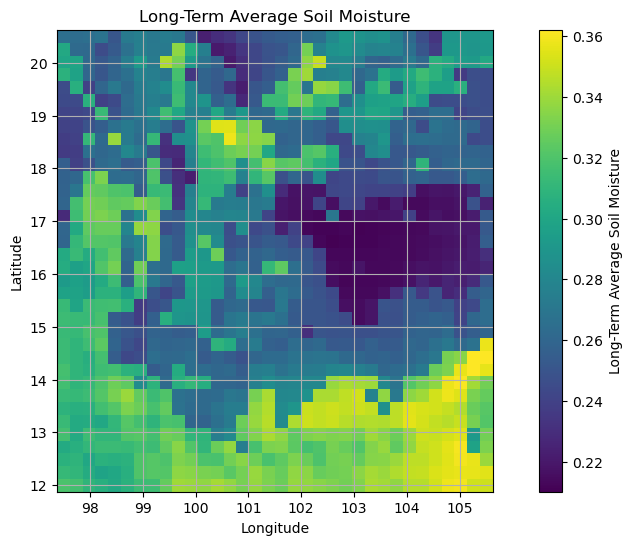

In [75]:
# Plotting
plt.figure(figsize=(12, 6))

plt.imshow(soil_moisture[0, :, :], extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap='viridis')
plt.colorbar(label='Long-Term Average Soil Moisture')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Long-Term Average Soil Moisture')
plt.grid(True)
plt.show()

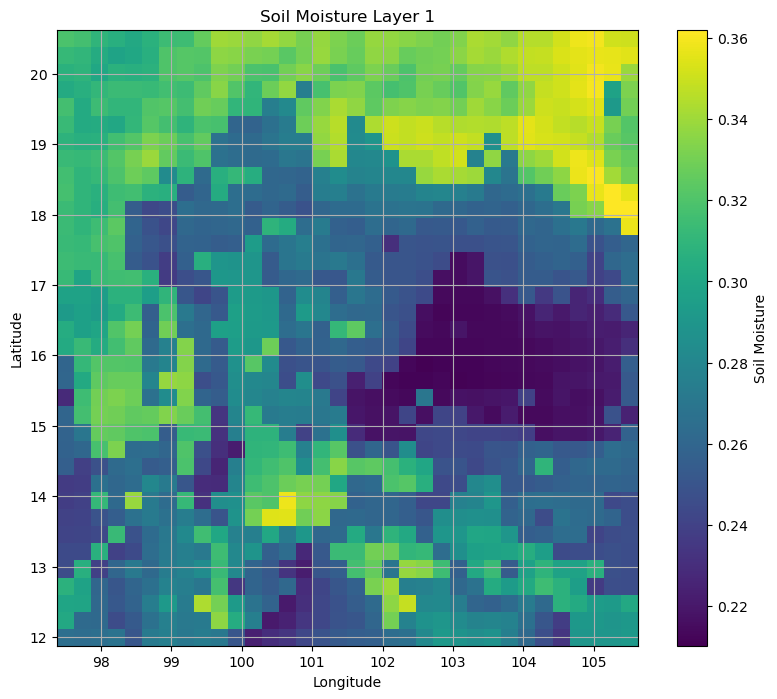

<Figure size 640x480 with 0 Axes>

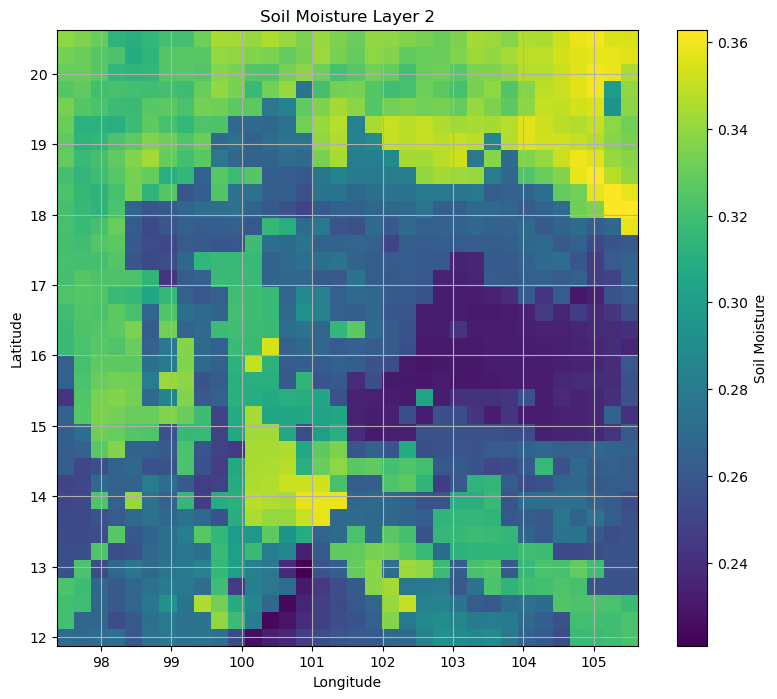

<Figure size 640x480 with 0 Axes>

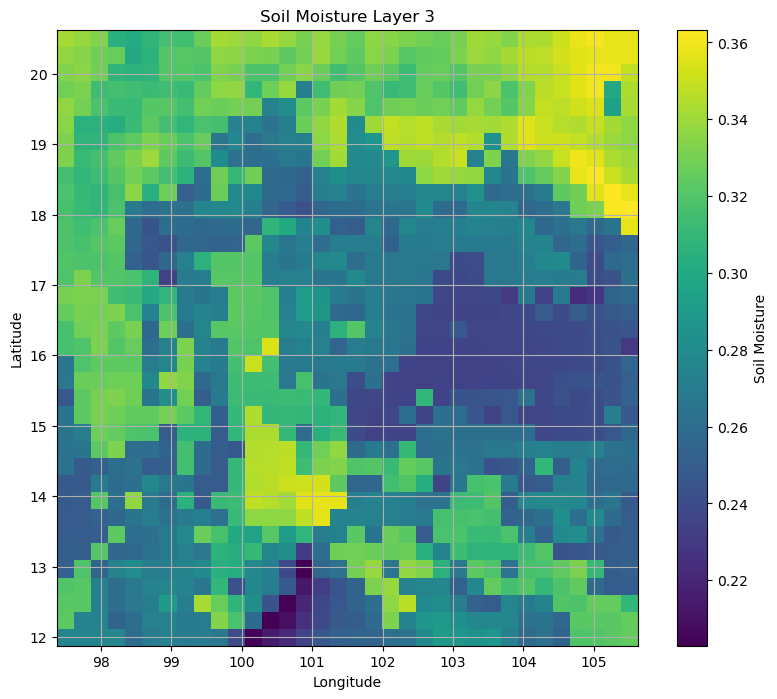

<Figure size 640x480 with 0 Axes>

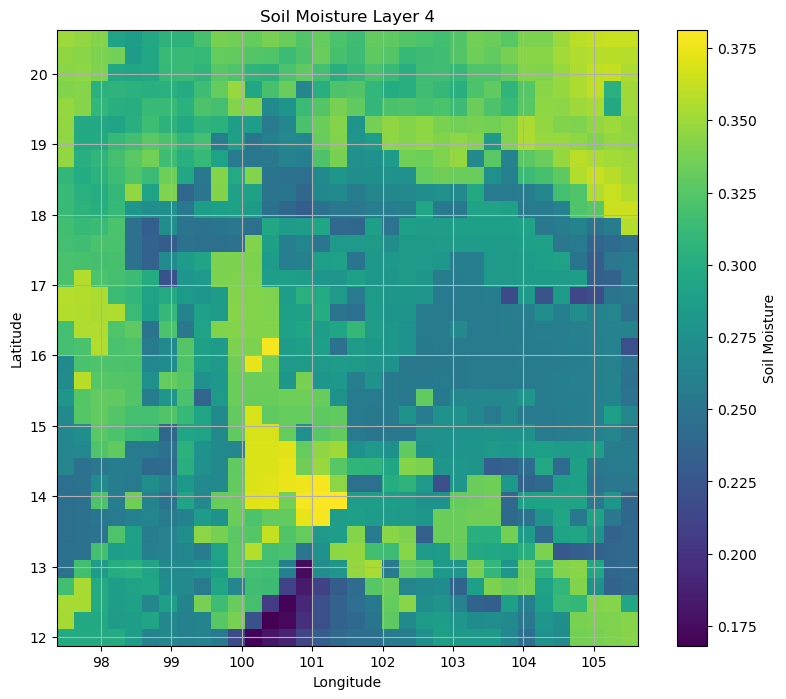

<Figure size 640x480 with 0 Axes>

In [119]:
# Plotting each layer
for layer_idx in range(soil_moisture.shape[0]):
    # Select data for the current layer
    layer_soil_moisture = soil_moisture[layer_idx, :, :]

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(layer_soil_moisture, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap='viridis', origin='lower')
    plt.colorbar(label='Soil Moisture')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Soil Moisture Layer {layer_idx + 1}')
    plt.grid(True)
    plt.show()

    # Optionally, save the plot
    plt.savefig(f'soil_moisture_layer_{layer_idx + 1}.png')

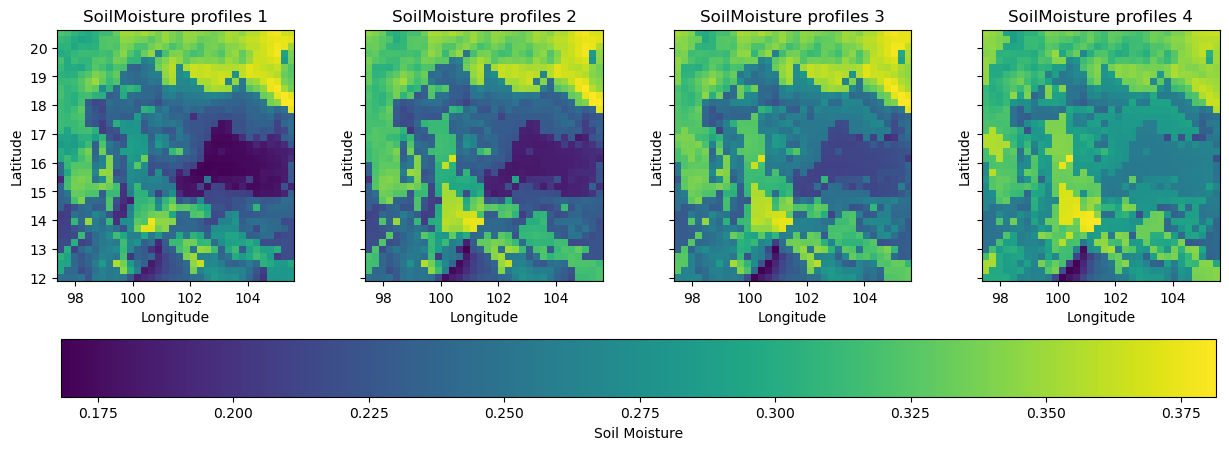

In [125]:
# Number of layers
num_layers = soil_moisture.shape[0]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_layers, figsize=(15, 5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot each layer
for layer_idx in range(num_layers):
    ax = axes[layer_idx]
    layer_soil_moisture = soil_moisture[layer_idx, :, :]
    
    cax = ax.imshow(layer_soil_moisture, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap='viridis', origin='lower')
    ax.set_title(f'SoilMoisture profiles {layer_idx + 1}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
# Add a colorbar

fig.colorbar(cax, ax=axes, orientation='horizontal', label='Soil Moisture')

plt.show()

In [161]:
# Convert time dimension to a pandas DatetimeIndex
time_index = pd.to_datetime(ds_surface['time'].values)
print(time_index.shape)

(5113,)


In [83]:
# Loop through each year and plot
years = np.unique(time_index.year)

In [213]:
years.shape

(15,)

In [167]:
# Number of layers
num_layers = soil_moisture.shape[1]
num_layers

4

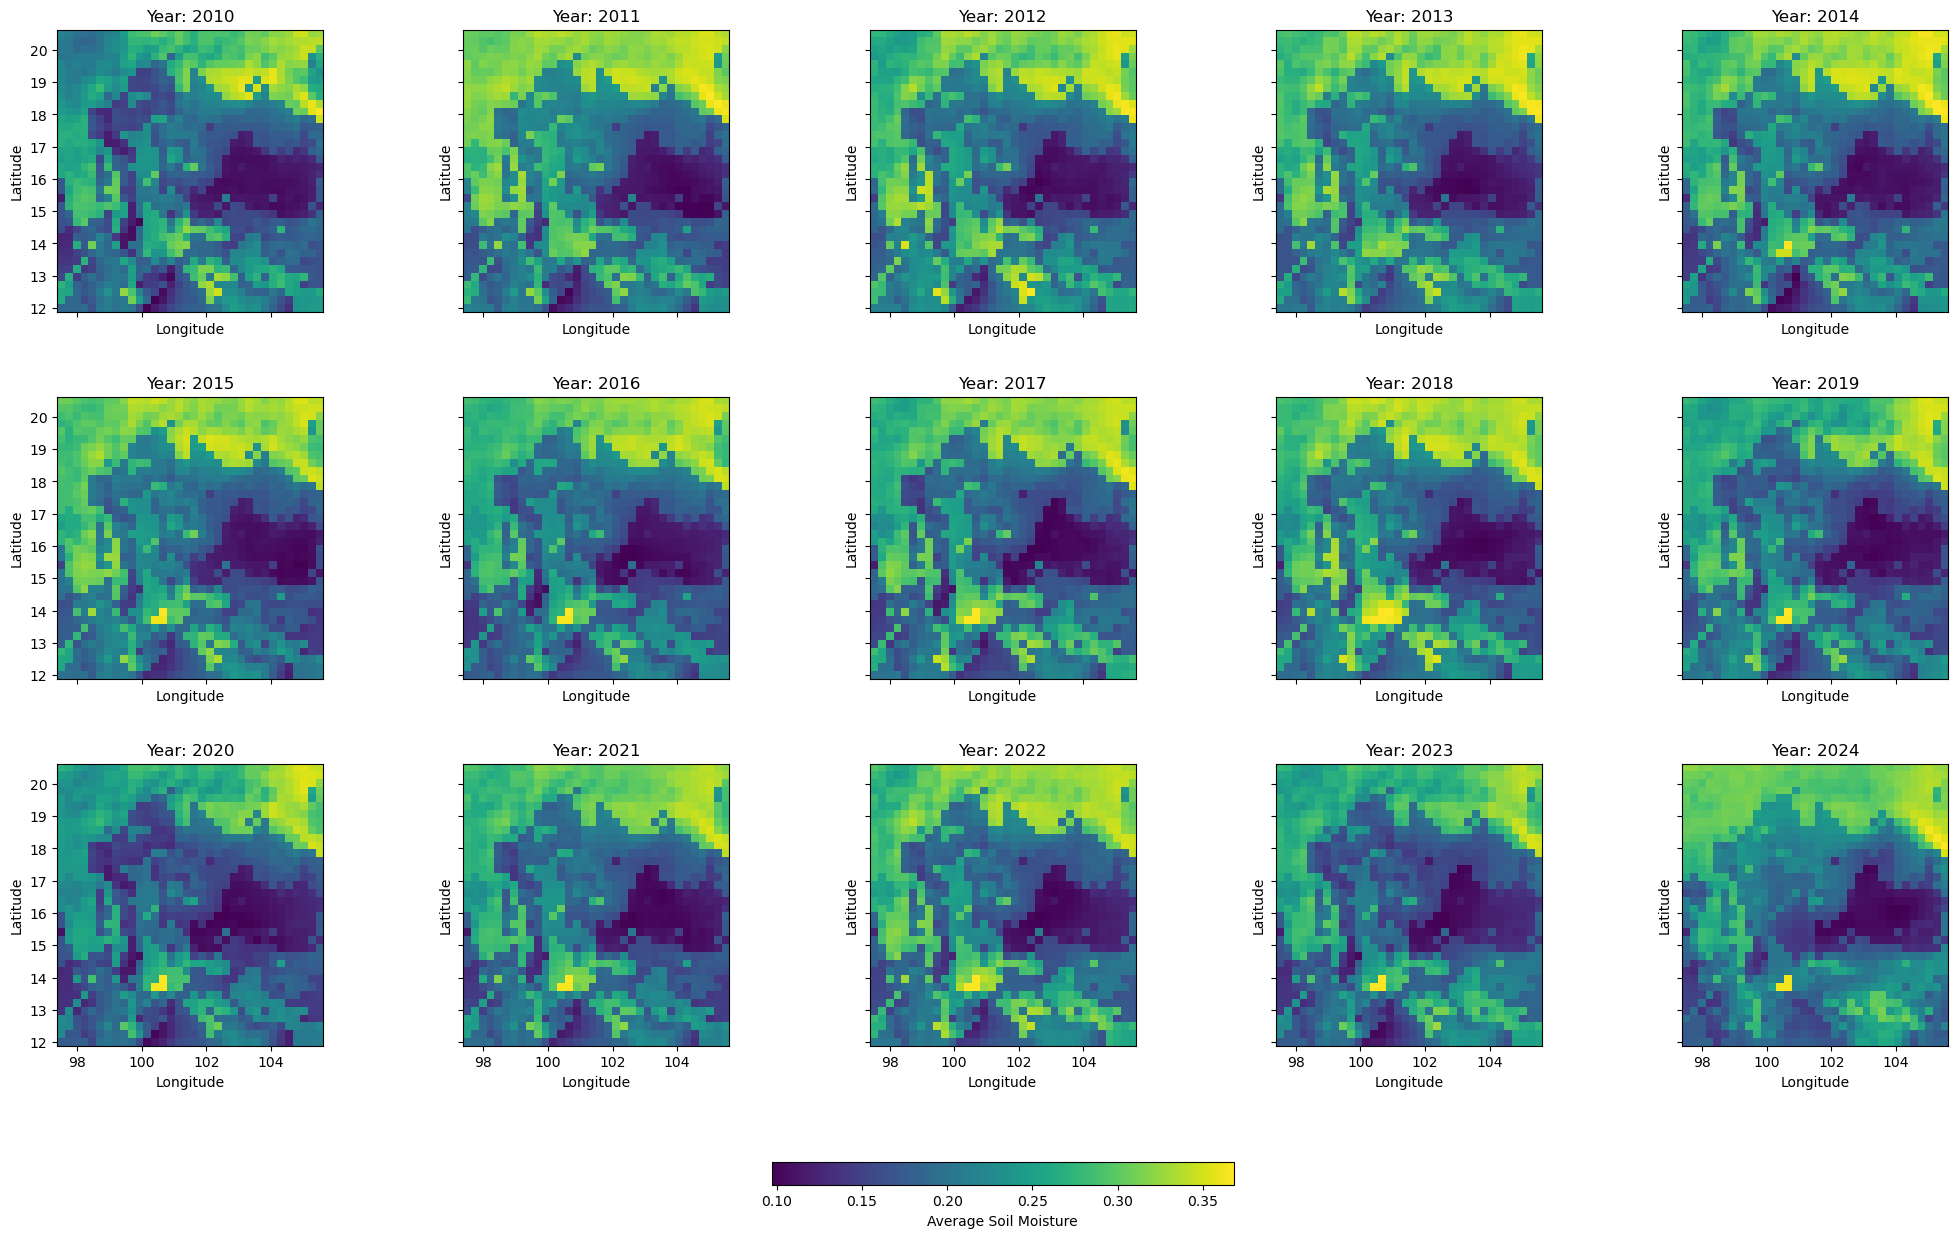

In [197]:
# Select a specific layer to plot (e.g., the first layer)
selected_layer_idx = 0  # Change this index to select different layers


import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Create subplots for each year with 5 columns and 3 rows
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the selected layer for each year
for year_idx, year in enumerate(years):
    # Select data for the current year
    year_mask = (time_index.year == year)
    
    # Compute average soil moisture for the current year and selected layer
    yearly_soil_moisture = soil_moisture[year_mask, selected_layer_idx, :, :].mean(axis=0)  # Average over time points in the year

    ax = axes[year_idx]
    cax = ax.imshow(yearly_soil_moisture, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap='viridis', origin='lower')
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a single colorbar for the entire plot
fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='horizontal', label='Average Soil Moisture', fraction=0.02, pad=0.1)

plt.show()

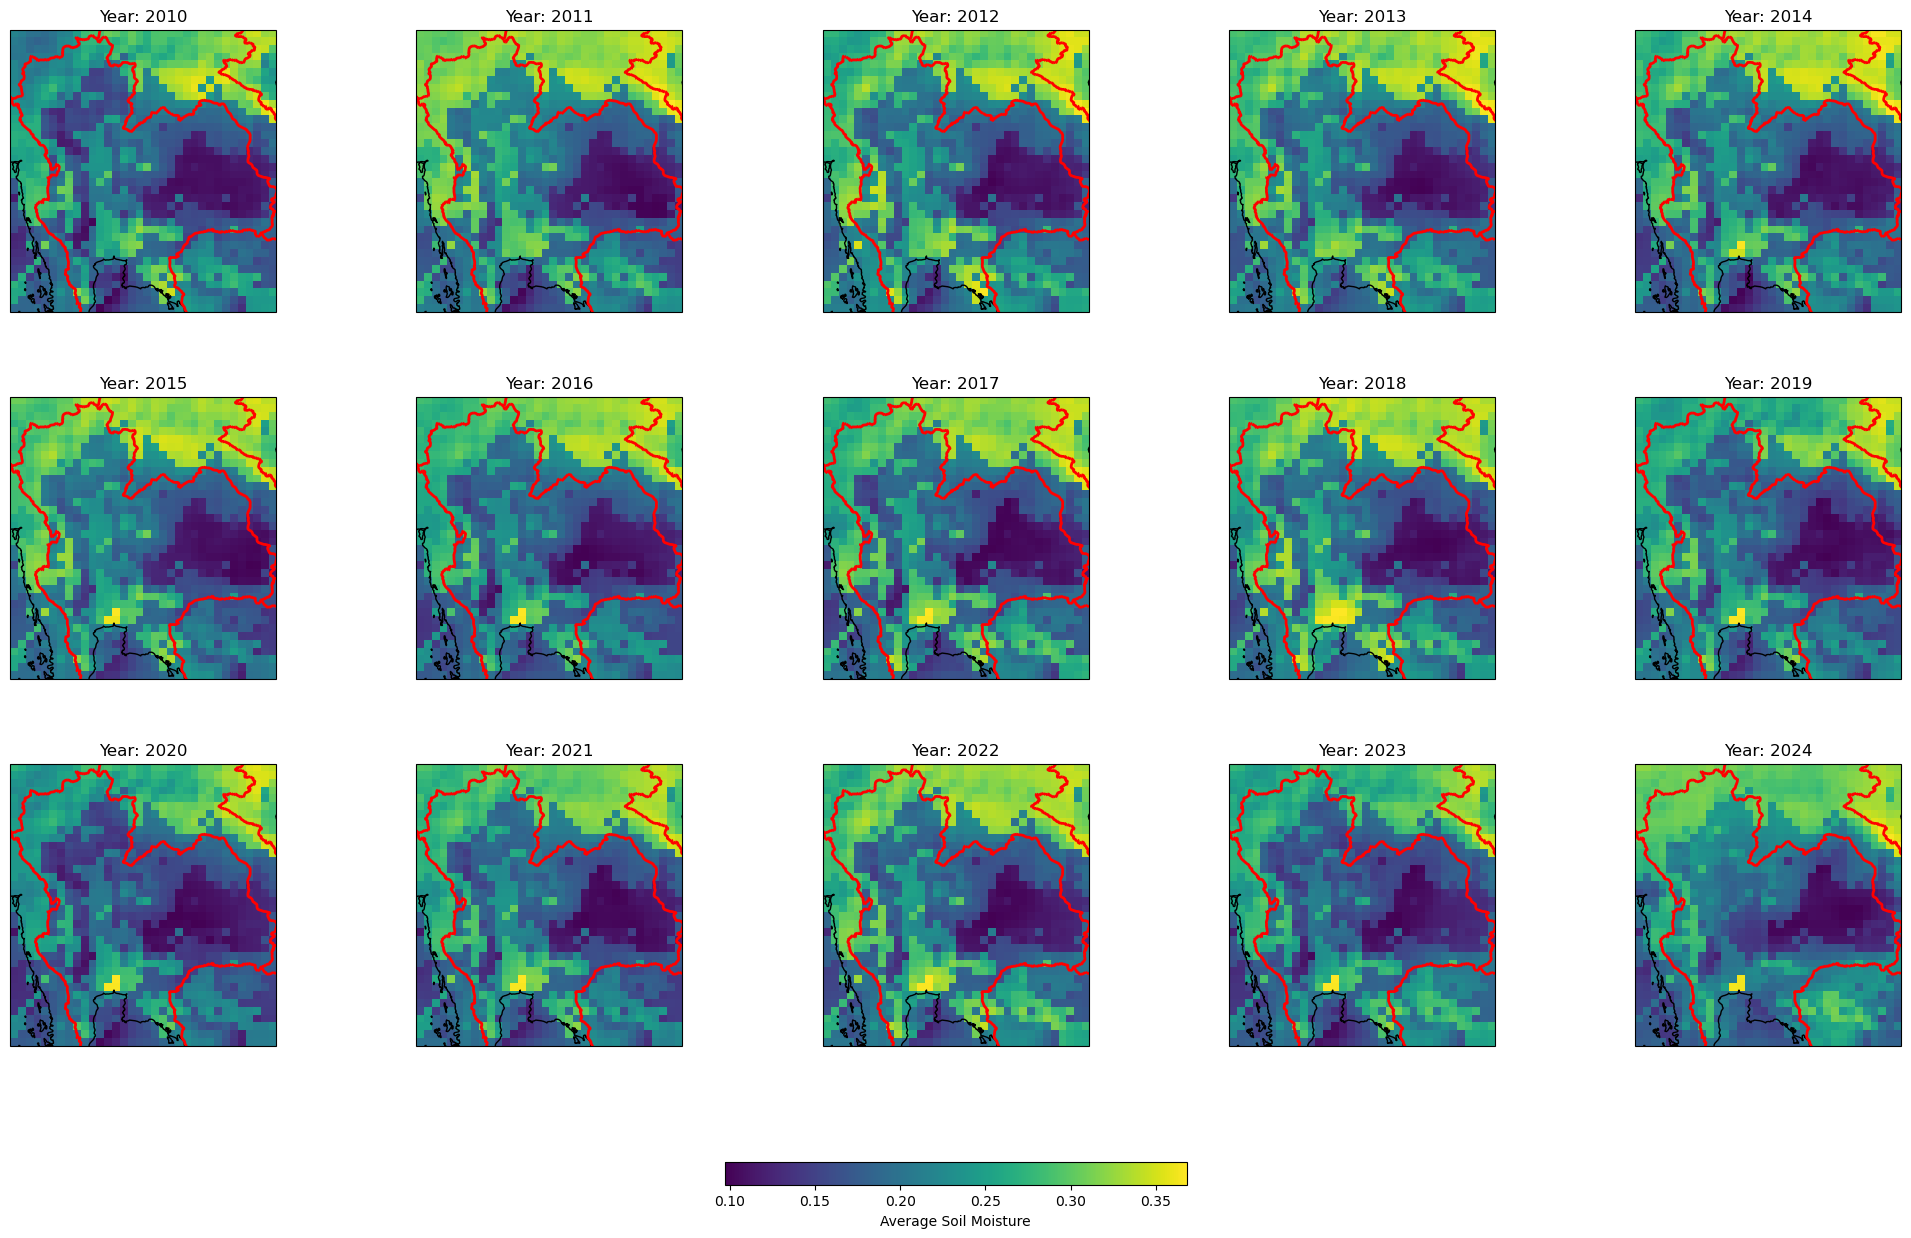

In [205]:
# Create subplots for each year with 5 columns and 3 rows, using Cartopy's PlateCarree projection
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the selected layer for each year
for year_idx, year in enumerate(years):
    if year_idx >= len(axes):  # Avoid index error if there are more years than subplots
        break
        
    # Select data for the current year
    year_mask = (time_index.year == year)
    
    # Compute average soil moisture for the current year and selected layer
    yearly_soil_moisture = soil_moisture[year_mask, selected_layer_idx, :, :].mean(axis=0)  # Average over time points in the year

    ax = axes[year_idx]
    # Plot data with geographic projection
    cax = ax.imshow(yearly_soil_moisture, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), 
                    cmap='viridis', origin='lower', transform=ccrs.PlateCarree())
    ax.set_title(f'Year: {year}')
    
    # Set extent for each subplot
    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())
    
    # Add geographic features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')

# Hide any remaining empty subplots
for ax in axes[year_idx + 1:]:
    ax.axis('off')

# Add a single colorbar for the entire plot
fig.colorbar(cax, ax=axes, orientation='horizontal', label='Average Soil Moisture', fraction=0.02, pad=0.1)

plt.show()

In [207]:
# **Combine layers** by averaging across the second dimension (layers)
combined_soil_moisture = soil_moisture.mean(axis=1)  # Shape: (time, north_south, east_west)

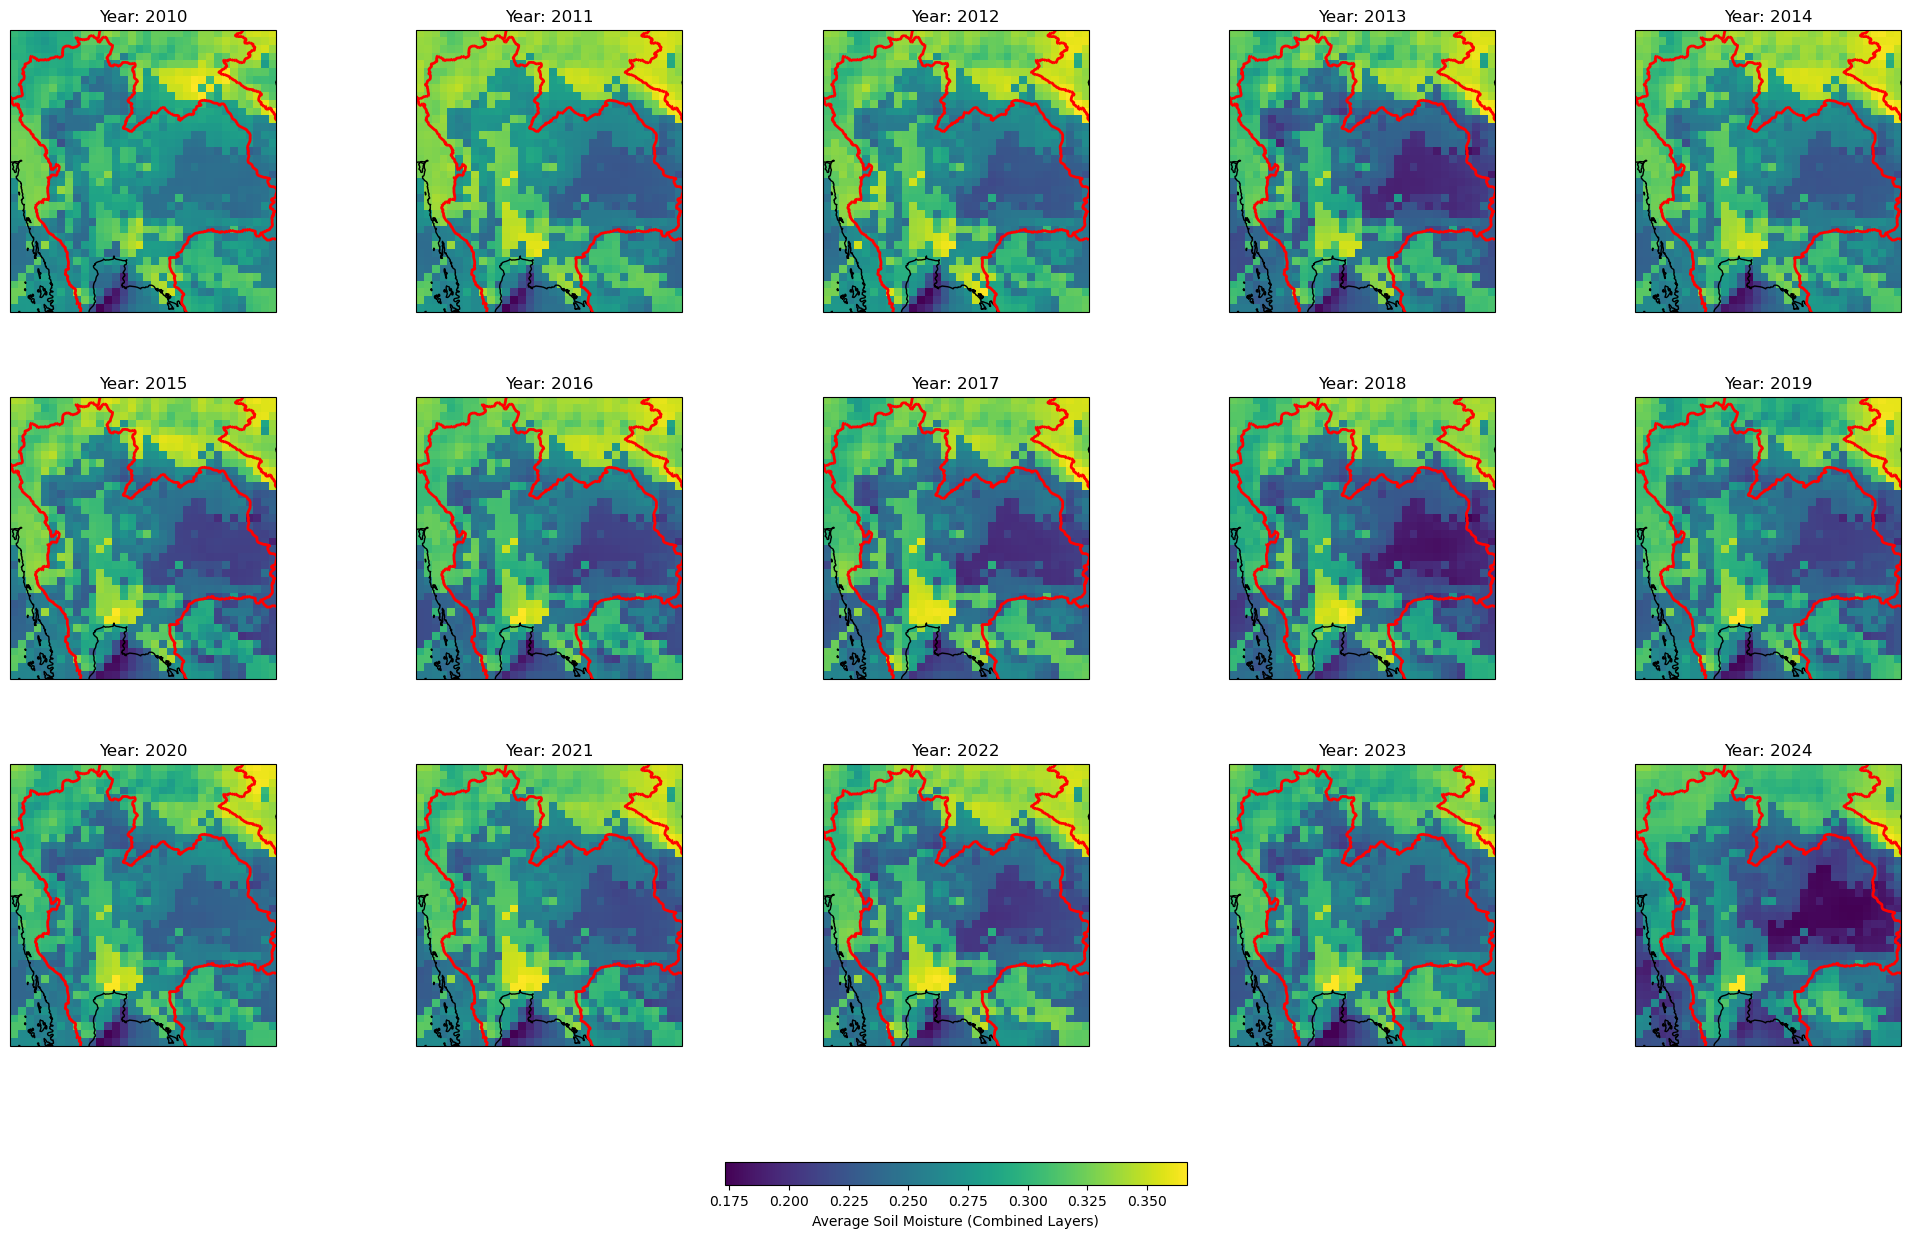

In [211]:
# Create subplots for each year with 5 columns and 3 rows, using Cartopy's PlateCarree projection
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the combined soil moisture for each year
for year_idx, year in enumerate(years):
    if year_idx >= len(axes):  # Avoid index error if there are more years than subplots
        break
        
    # Select data for the current year
    year_mask = (time_index.year == year)
    
    # Compute average combined soil moisture for the current year
    yearly_soil_moisture = combined_soil_moisture[year_mask, :, :].mean(axis=0)  # Average over time points in the year

    ax = axes[year_idx]
    # Plot data with geographic projection
    cax = ax.imshow(yearly_soil_moisture, extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), 
                    cmap='viridis', origin='lower', transform=ccrs.PlateCarree())
    ax.set_title(f'Year: {year}')
    
    # Set extent for each subplot
    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())
    
    # Add geographic features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')

# Hide any remaining empty subplots
for ax in axes[year_idx + 1:]:
    ax.axis('off')

# Add a single colorbar for the entire plot
fig.colorbar(cax, ax=axes, orientation='horizontal', label='Average Soil Moisture (Combined Layers)', fraction=0.02, pad=0.1)

plt.show()

In [221]:
# Ensure latitude and longitude are 2D arrays
latitude_2D = ds_surface['lat'].values[0, :, :]  # Shape: (north_south, east_west)
longitude_2D = ds_surface['lon'].values[0, :, :]  # Shape: (north_south, east_west)

In [223]:
longitude_2D.shape

(36, 34)

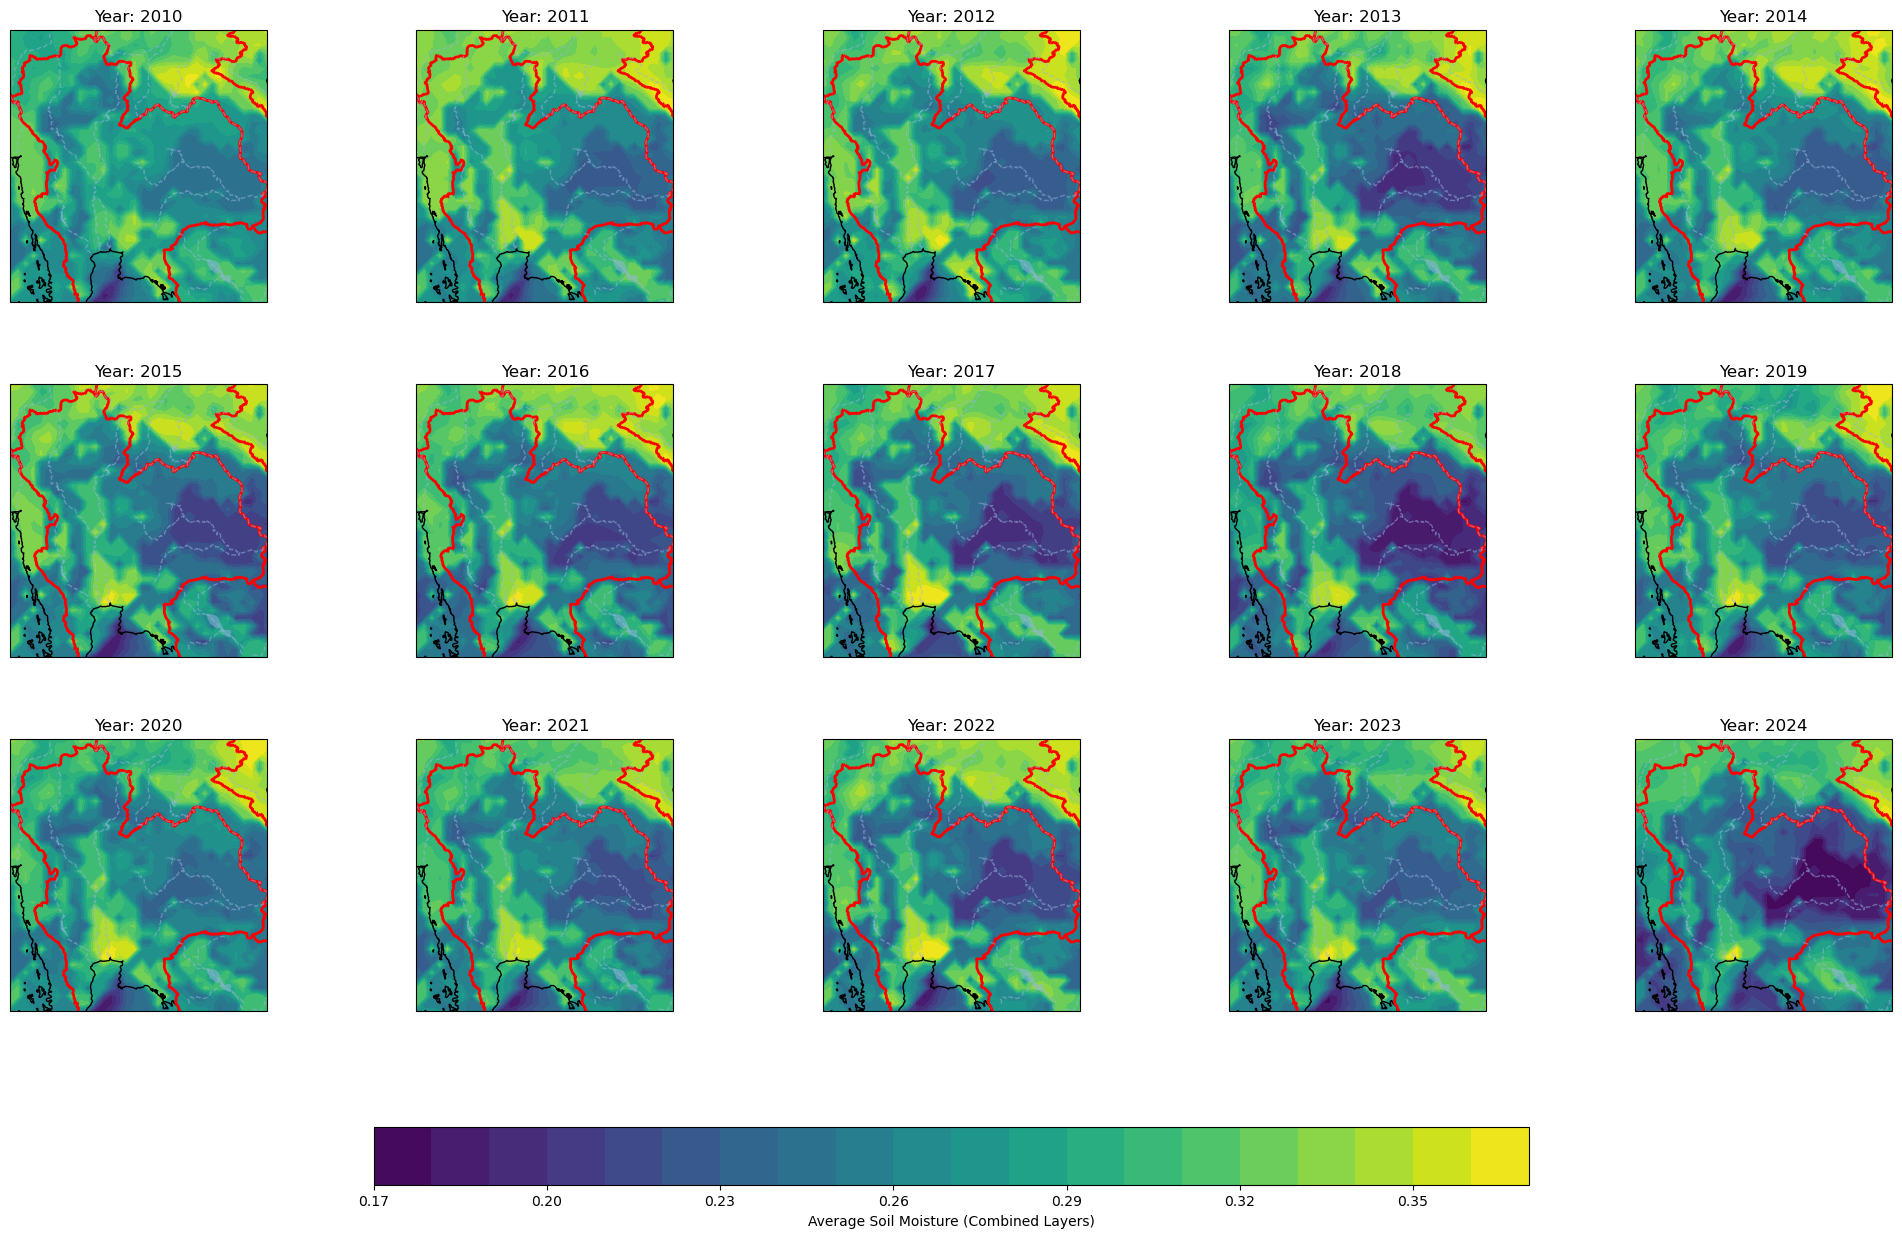

In [231]:
# Create subplots for each year with 5 columns and 3 rows, using Cartopy's PlateCarree projection
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the combined soil moisture for each year
for year_idx, year in enumerate(years):
    if year_idx >= len(axes):  # Avoid index error if there are more years than subplots
        break
        
    # Select data for the current year
    year_mask = (time_index.year == year)
    
    # Compute average combined soil moisture for the current year
    yearly_soil_moisture = combined_soil_moisture[year_mask, :, :].mean(axis=0)  # Average over time points in the year

    ax = axes[year_idx]
    
    # Plot data with contourf and geographic projection
    contour = ax.contourf(longitude_2D, latitude_2D, yearly_soil_moisture, 
                          levels=20, cmap='viridis', transform=ccrs.PlateCarree())
    
    ax.set_title(f'Year: {year}')
    
    # Set extent for each subplot
    ax.set_extent([longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()], crs=ccrs.PlateCarree())
    
    # Add geographic features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS, linestyle='--', alpha=0.5)

# Hide any remaining empty subplots
for ax in axes[year_idx + 1:]:
    ax.axis('off')

# Add a single colorbar for the entire plot
cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', label='Average Soil Moisture (Combined Layers)', fraction=0.05, pad=0.1)

plt.show()

In [237]:
# Calculate the long-term average and standard deviation across all time points
long_term_average = combined_soil_moisture.mean(axis=0)  # Shape: (north_south, east_west)
long_term_std = combined_soil_moisture.std(axis=0)  # Shape: (north_south, east_west)

In [ ]:
#Set contour levels from -3 to +3 standard deviations to visualize the range of anomalies.

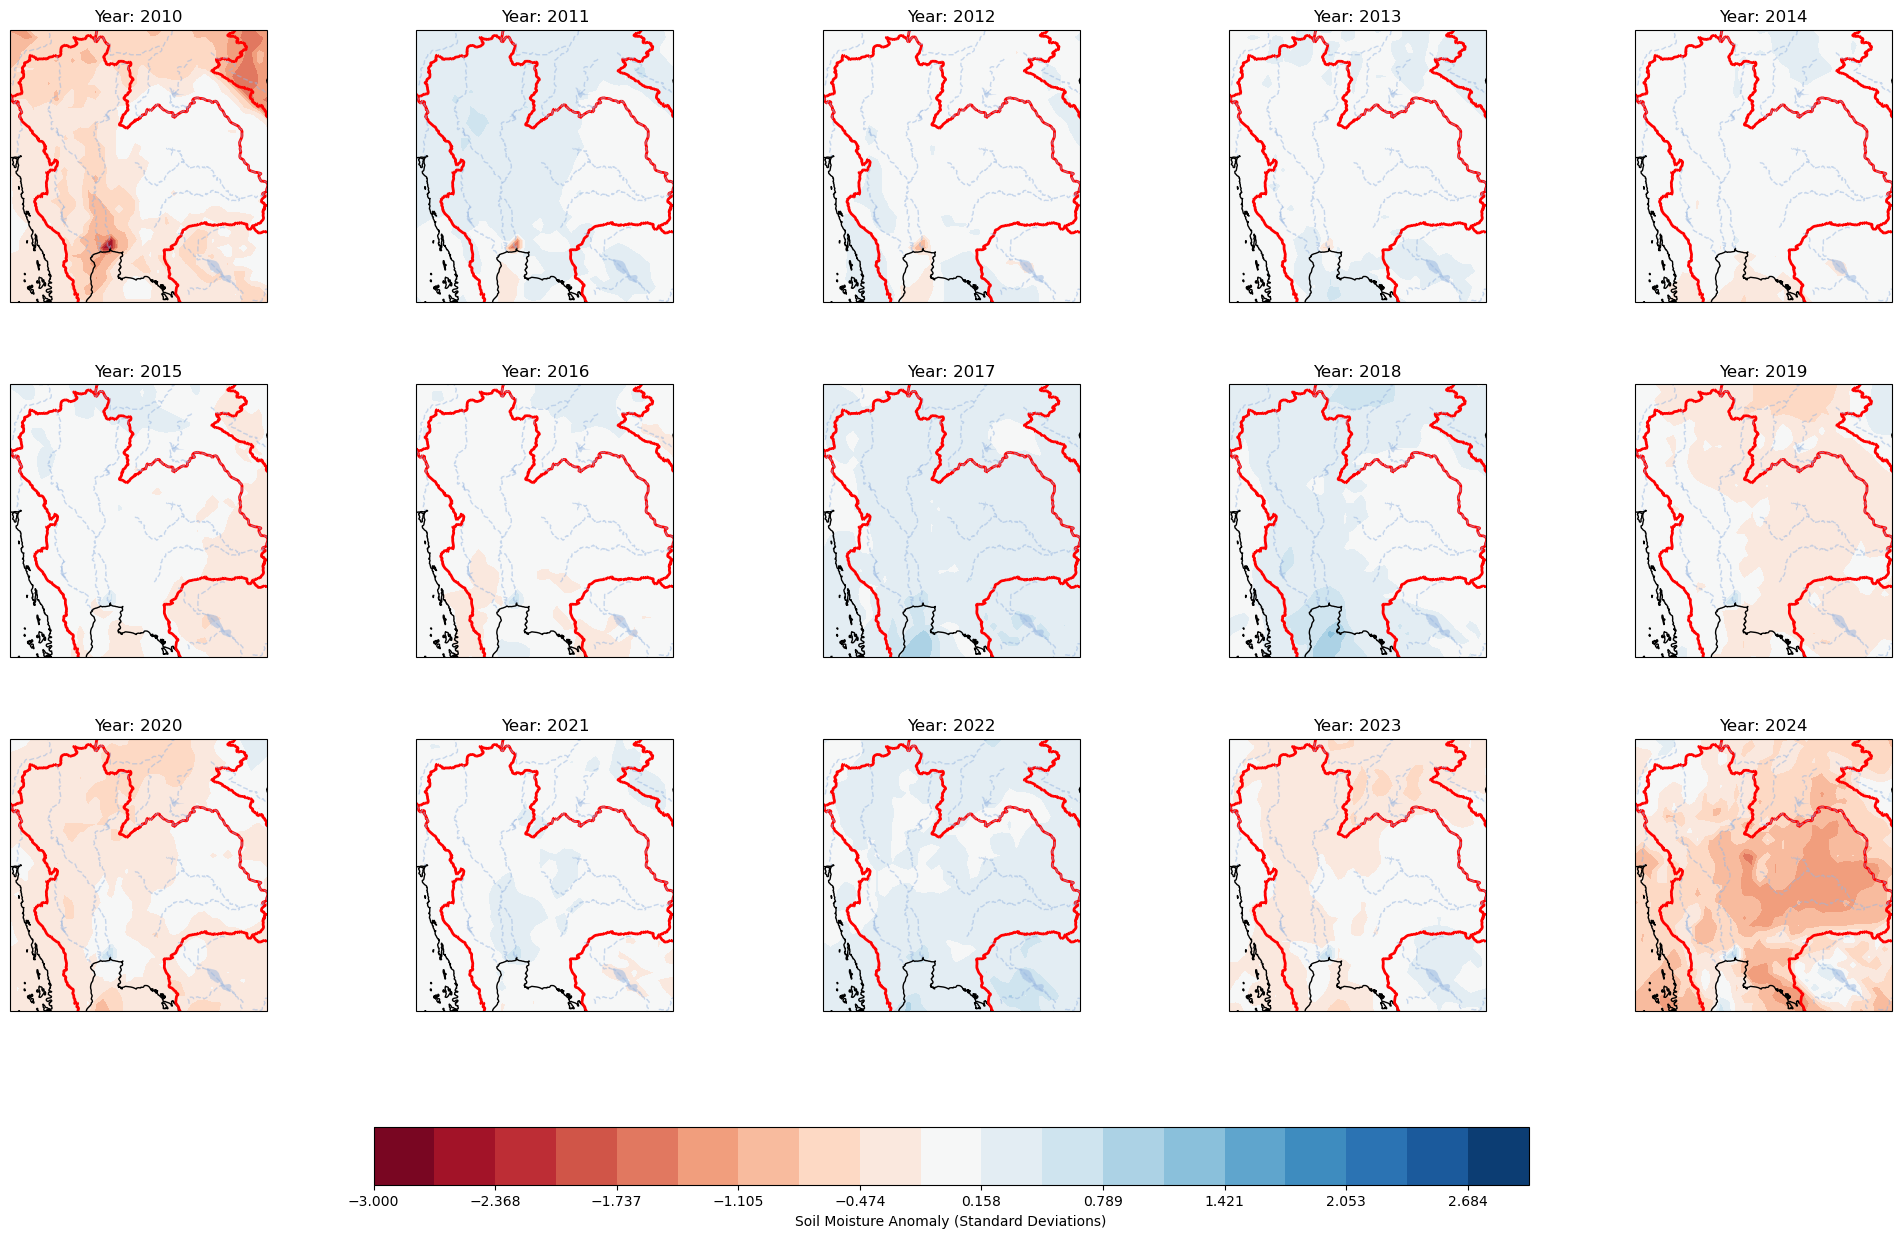

In [239]:
# Create subplots for each year with 5 columns and 3 rows, using Cartopy's PlateCarree projection
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the anomaly in standard deviations for each year
for year_idx, year in enumerate(years):
    if year_idx >= len(axes):  # Avoid index error if there are more years than subplots
        break
        
    # Select data for the current year
    year_mask = (time_index.year == year)
    
    # Compute average combined soil moisture for the current year
    yearly_soil_moisture = combined_soil_moisture[year_mask, :, :].mean(axis=0)  # Average over time points in the year
    
    # Calculate the anomaly as standard deviations from the long-term average
    anomaly_std_dev = (yearly_soil_moisture - long_term_average) / long_term_std  # Shape: (north_south, east_west)

    ax = axes[year_idx]
    
    # Plot data with contourf and geographic projection
    contour = ax.contourf(longitude_2D, latitude_2D, anomaly_std_dev, 
                          levels=np.linspace(-3, 3, 20), cmap='RdBu', transform=ccrs.PlateCarree())
    
    ax.set_title(f'Year: {year}')
    
    # Set extent for each subplot
    ax.set_extent([longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()], crs=ccrs.PlateCarree())
    
    # Add geographic features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS, linestyle='--', alpha=0.5)

# Hide any remaining empty subplots
for ax in axes[year_idx + 1:]:
    ax.axis('off')

# Add a single colorbar for the entire plot
cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', label='Soil Moisture Anomaly (Standard Deviations)', fraction=0.05, pad=0.1)

plt.show()

In [ ]:
#Positive Anomalies: above the long-term average : xcessive rainfall, reduced evaporation, cooler temperatures, or other factors.
#Negative Anomalies : below the long-term average : drought, higher temperatures leading to more evaporation, less rainfall, or other factors.

In [241]:
#Calculate the Long-Term Average Soil Moisture:

# Calculate linear trends in soil moisture values over time using linregress
trends = np.empty_like(long_term_average)  # Initialize an array for trends with the same shape

In [255]:
trends.shape

(36, 34)

In [269]:
yearly_averages = np.empty((len(years), combined_soil_moisture.shape[1], combined_soil_moisture.shape[2]))  # (years, north_south, east_west)
print(yearly_averages.shape)

(15, 36, 34)


In [271]:
for i, year in enumerate(years):
    year_mask = time_index.year == year
    yearly_averages[i, :, :] = combined_soil_moisture[year_mask, :, :].mean(axis=0)

In [277]:
for i in range(trends.shape[0]):  # Iterate over north_south
    for j in range(trends.shape[1]):  # Iterate over east_west
        # Extract the time series of yearly averages for each grid cell
        yearly_time_series = yearly_averages[:, i, j]
        
        # Perform linear regression to get the slope (trend) over years
        slope, intercept, r_value, p_value, std_err = linregress(years, yearly_time_series)
        
        # Store the slope as the trend
        trends[i, j] = slope

In [293]:
print(trends.max())
print(trends.mean())
print(trends.min())

0.007943338
-0.0007094821
-0.0024975936


In [303]:
np.linspace(-0.01, 0.01, 21)

array([-0.01 , -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003,
       -0.002, -0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,
        0.006,  0.007,  0.008,  0.009,  0.01 ])

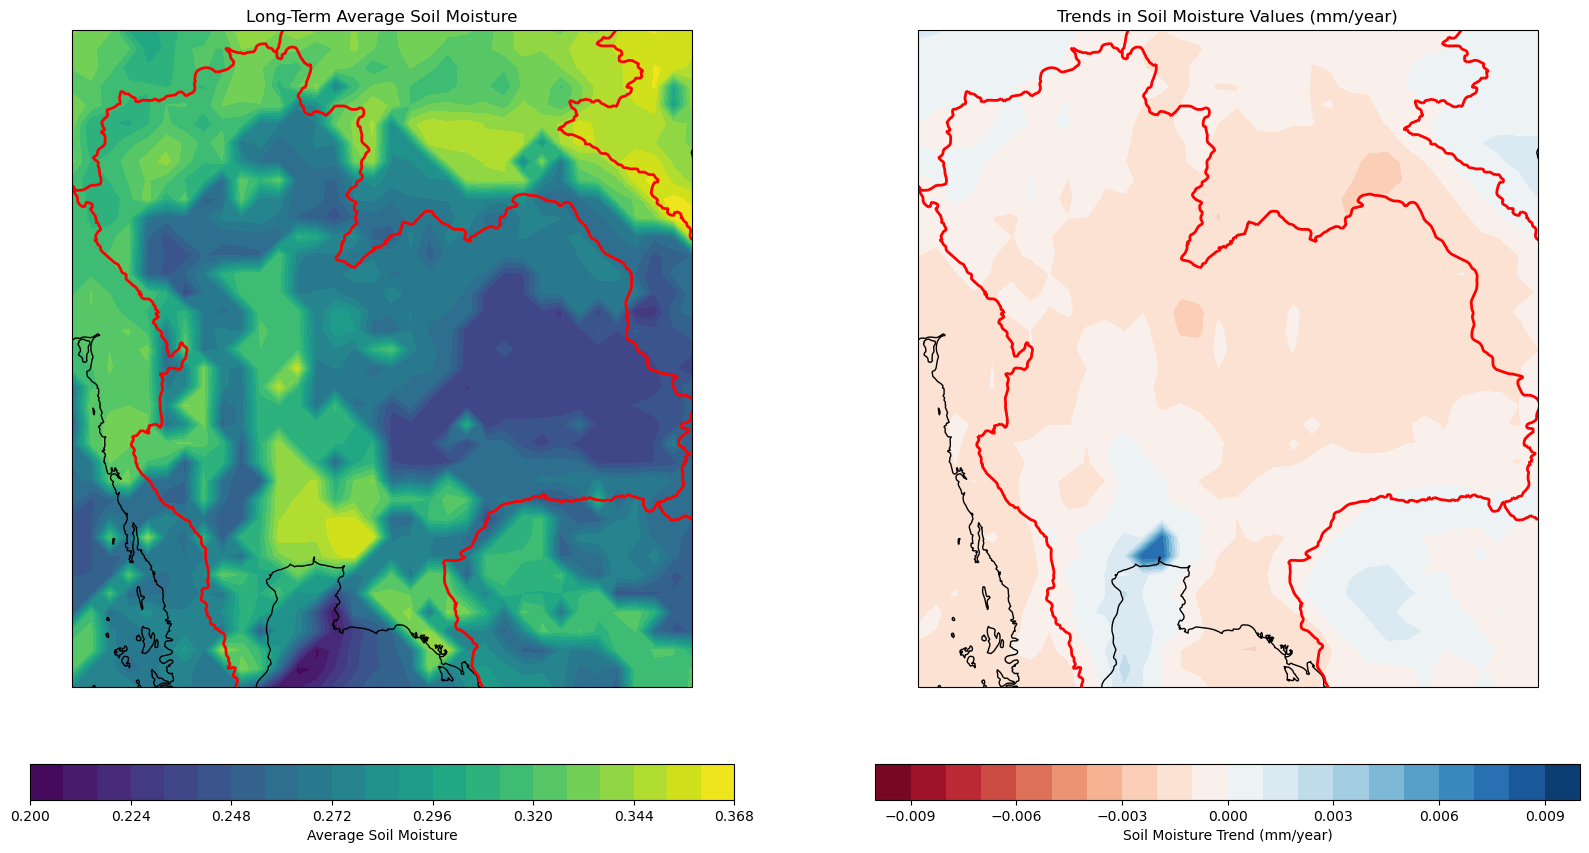

In [305]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot long-term average soil moisture (left)
ax1.set_title('Long-Term Average Soil Moisture')
contour1 = ax1.contourf(longitude_2D, latitude_2D, long_term_average, levels=20, cmap='viridis', transform=ccrs.PlateCarree())
ax1.set_extent([longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')
cbar1 = fig.colorbar(contour1, ax=ax1, orientation='horizontal', fraction=0.046, pad=0.1)
cbar1.set_label('Average Soil Moisture')

# Plot trends in soil moisture values (right)
ax2.set_title('Trends in Soil Moisture Values (mm/year)')
contour2 = ax2.contourf(longitude_2D, latitude_2D, trends, levels=np.linspace(-0.01, 0.01, 21), cmap='RdBu', transform=ccrs.PlateCarree())
ax2.set_extent([longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')
cbar2 = fig.colorbar(contour2, ax=ax2, orientation='horizontal', fraction=0.046, pad=0.1)
cbar2.set_label('Soil Moisture Trend (mm/year)')

plt.show()

In [333]:
# Find the indices of the maximum and minimum trends
max_trend_indices = np.unravel_index(np.argmax(trends), trends.shape)
min_trend_indices = np.unravel_index(np.argmin(trends), trends.shape)

print(f"Location with highest positive trend (increasing soil moisture): {max_trend_indices}, Trend: {trends[max_trend_indices]:.6f} mm/year")
print(f"Location with highest negative trend (decreasing soil moisture): {min_trend_indices}, Trend: {trends[min_trend_indices]:.6f} mm/year")

# Corresponding latitude and longitude
max_trend_lat, max_trend_lon = latitude_2D[max_trend_indices], longitude_2D[max_trend_indices]
min_trend_lat, min_trend_lon = latitude_2D[min_trend_indices], longitude_2D[min_trend_indices]

print(f"Coordinates of max positive trend: (Lat: {max_trend_lat}, Lon: {max_trend_lon})")
print(f"Coordinates of max negative trend: (Lat: {min_trend_lat}, Lon: {min_trend_lon})")

Location with highest positive trend (increasing soil moisture): (7, 12), Trend: 0.007943 mm/year
Location with highest negative trend (decreasing soil moisture): (27, 24), Trend: -0.002498 mm/year
Coordinates of max positive trend: (Lat: 13.625, Lon: 100.375)
Coordinates of max negative trend: (Lat: 18.625, Lon: 103.375)


In [335]:
#Visualize Trends for Specific Areas
# Extract time series for the max positive and negative trend locations
max_trend_series = yearly_averages[:, max_trend_indices[0], max_trend_indices[1]]
min_trend_series = yearly_averages[:, min_trend_indices[0], min_trend_indices[1]]

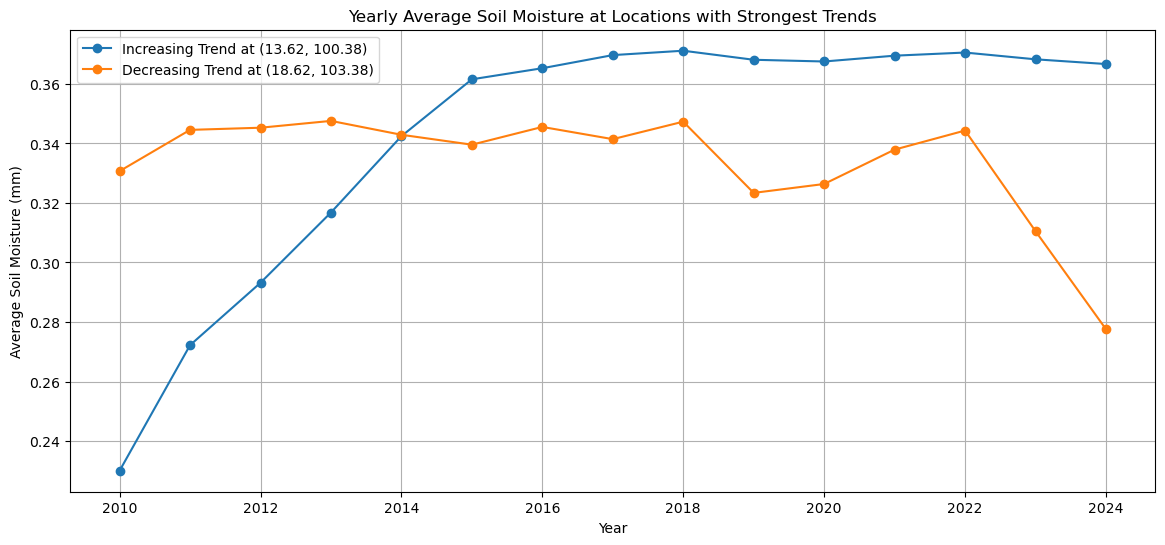

In [339]:
# Plotting the time series for both locations
plt.figure(figsize=(14, 6))

plt.plot(years, max_trend_series, label=f'Increasing Trend at ({max_trend_lat:.2f}, {max_trend_lon:.2f})', marker='o')
plt.plot(years, min_trend_series, label=f'Decreasing Trend at ({min_trend_lat:.2f}, {min_trend_lon:.2f})', marker='o')

plt.title('Yearly Average Soil Moisture at Locations with Strongest Trends')
plt.xlabel('Year')
plt.ylabel('Average Soil Moisture (mm)')
plt.legend()
plt.grid(True)
plt.show()

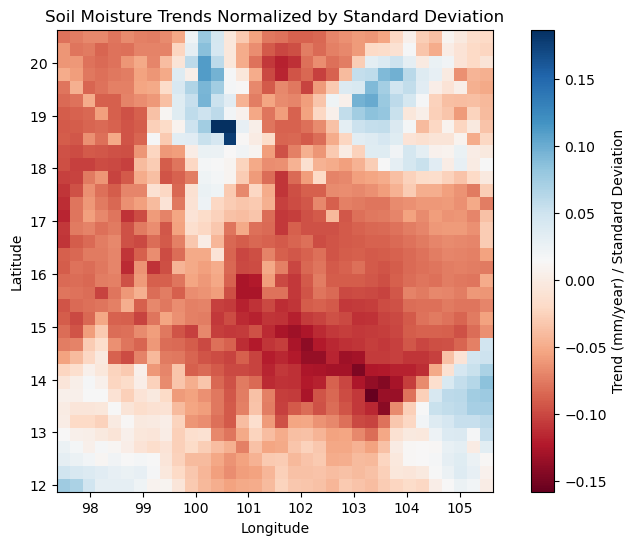

In [341]:
#Plotting Trends with Standard Deviations
# Calculate standard deviation of yearly averages for each grid cell
std_dev = yearly_averages.std(axis=0)

# Normalize trends by standard deviation
normalized_trends = trends / std_dev

# Plot normalized trends
plt.figure(figsize=(10, 6))
plt.imshow(normalized_trends, cmap='RdBu', extent=(longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()))
plt.colorbar(label='Trend (mm/year) / Standard Deviation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Soil Moisture Trends Normalized by Standard Deviation')
plt.show()

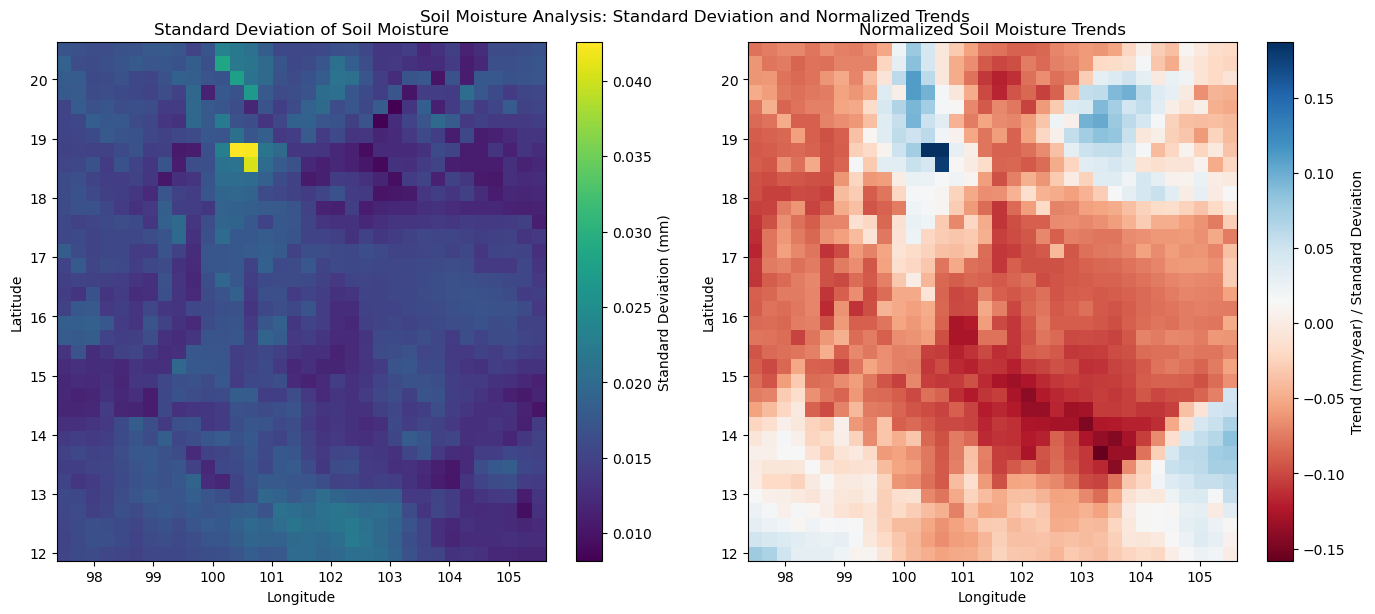

In [411]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Standard Deviation
std_plot = ax1.imshow(std_dev, cmap='viridis', 
                      extent=(longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()))
ax1.set_title('Standard Deviation of Soil Moisture')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
plt.colorbar(std_plot, ax=ax1, label='Standard Deviation (mm)')

# Plot Normalized Trends
trend_plot = ax2.imshow(normalized_trends, cmap='RdBu', 
                        extent=(longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()))
ax2.set_title('Normalized Soil Moisture Trends')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
plt.colorbar(trend_plot, ax=ax2, label='Trend (mm/year) / Standard Deviation')

plt.suptitle('Soil Moisture Analysis: Standard Deviation and Normalized Trends')
plt.tight_layout()
plt.show()

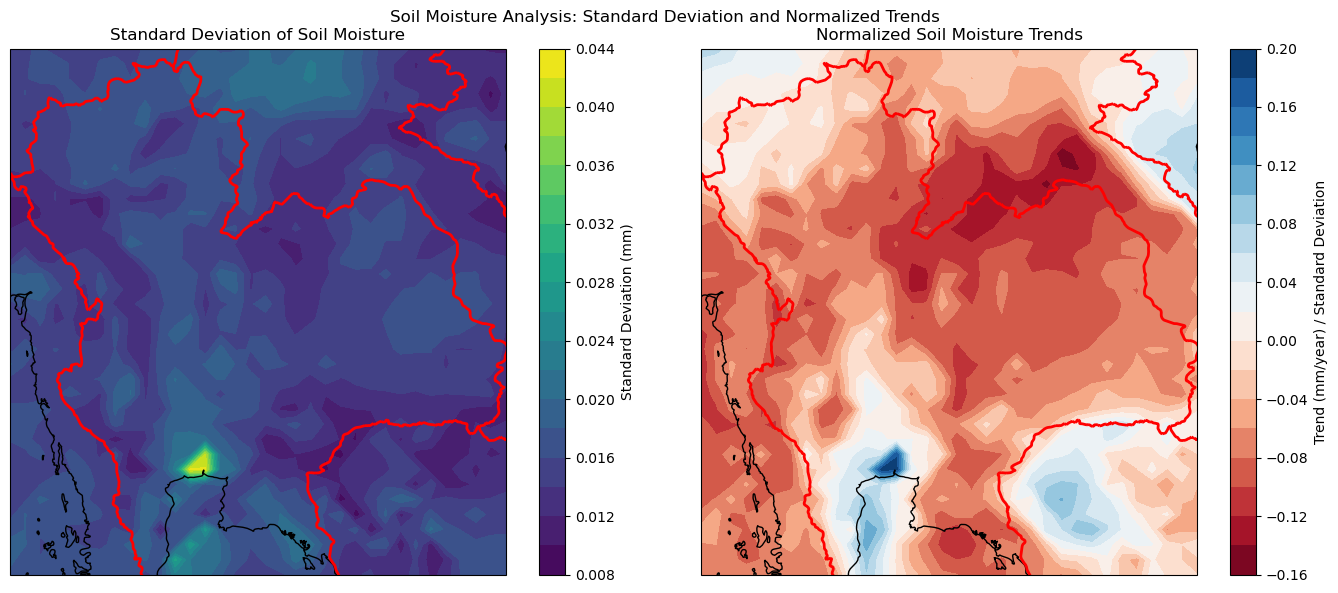

In [413]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Standard Deviation
std_plot = ax1.contourf(longitude_2D, latitude_2D, std_dev, 20, cmap='viridis', transform=ccrs.PlateCarree())
ax1.set_title('Standard Deviation of Soil Moisture')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')
plt.colorbar(std_plot, ax=ax1, orientation='vertical', label='Standard Deviation (mm)')

# Plot Normalized Trends
trend_plot = ax2.contourf(longitude_2D, latitude_2D, normalized_trends, 20, cmap='RdBu', transform=ccrs.PlateCarree())
ax2.set_title('Normalized Soil Moisture Trends')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor='red')
plt.colorbar(trend_plot, ax=ax2, orientation='vertical', label='Trend (mm/year) / Standard Deviation')

plt.suptitle('Soil Moisture Analysis: Standard Deviation and Normalized Trends')
plt.tight_layout()
plt.show()

In [393]:
yearly_averages.shape  

(15, 36, 34)

In [397]:
#compute the SSI and integrate it into a decision support
#1. Calculate the long-term average and standard deviation of soil moisture
long_term_mean = np.mean(yearly_averages, axis=0)  # Mean across years for each grid cell
long_term_std = np.std(yearly_averages, axis=0) 

In [399]:
# 2. Compute anomalies for each year by subtracting the long-term average
anomalies = yearly_averages - long_term_mean  # Anomalies for each year

In [401]:
# 3. Standardize anomalies to compute SSI
ssi = anomalies / long_term_std

In [403]:
# 4. Categorize SSI values into drought severity levels
def categorize_ssi(ssi_value):
    if ssi_value <= -2:
        return 'Extreme Drought'
    elif ssi_value <= -1.5:
        return 'Severe Drought'
    elif ssi_value <= -1:
        return 'Moderate Drought'
    elif ssi_value <= 1:
        return 'Near Normal'
    elif ssi_value <= 1.5:
        return 'Moderately Wet'
    elif ssi_value <= 2:
        return 'Severely Wet'
    else:
        return 'Extremely Wet'

In [405]:
# Apply categorization to the SSI values
ssi_categories = np.vectorize(categorize_ssi)(ssi)

In [407]:
# 5. Visualize the SSI map for a specific year (e.g., 2023)
year_index = -1  # Last year in the dataset

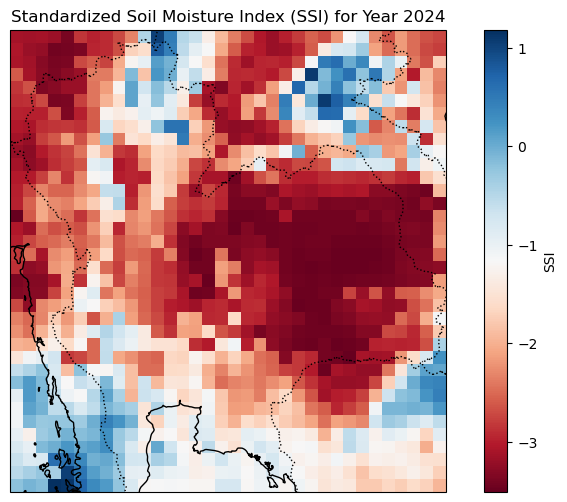

In [415]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot SSI
ssi_plot = ax.imshow(
    ssi[year_index, :, :], 
    cmap='RdBu', 
    extent=(longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()), 
    transform=ccrs.PlateCarree()
)
ax.set_title(f'Standardized Soil Moisture Index (SSI) for Year {years[year_index]}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add Cartopy features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add colorbar
plt.colorbar(ssi_plot, ax=ax, orientation='vertical', label='SSI')

plt.show()

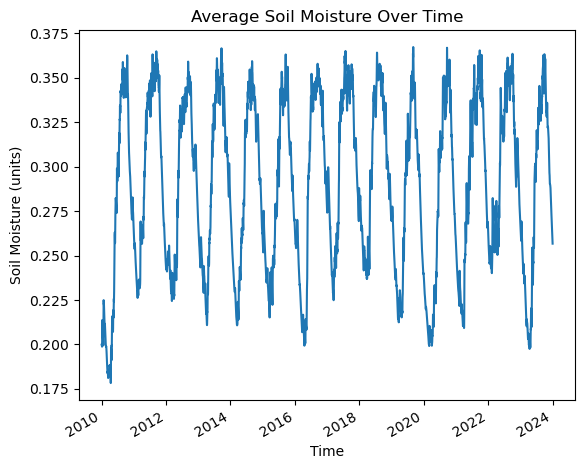

In [14]:
#Plot the Average Soil Moisture
import matplotlib.pyplot as plt

# Calculate the average soil moisture over time and plot it
soil_moisture_time_avg = soil_moisture.mean(dim=['SoilMoist_profiles', 'north_south', 'east_west'])

# Plot the time series of average soil moisture
soil_moisture_time_avg.plot()
plt.title('Average Soil Moisture Over Time')
plt.xlabel('Time')
plt.ylabel('Soil Moisture (units)')
#plt.savefig('average_soil_moisture_plot.png', dpi=300, bbox_inches='tight')
plt.show()

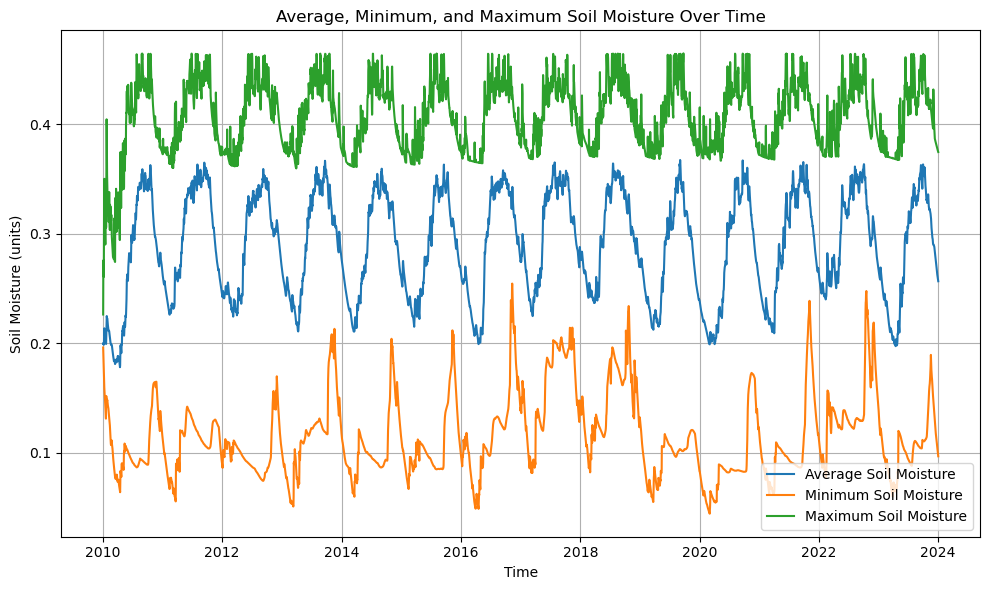

In [16]:
# Calculate statistics
soil_moisture_time_avg = soil_moisture.mean(dim=['SoilMoist_profiles', 'north_south', 'east_west'])
soil_moisture_time_min = soil_moisture.min(dim=['SoilMoist_profiles', 'north_south', 'east_west'])
soil_moisture_time_max = soil_moisture.max(dim=['SoilMoist_profiles', 'north_south', 'east_west'])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot average, minimum, and maximum soil moisture
plt.plot(soil_moisture_time_avg.time.values, soil_moisture_time_avg.values, label='Average Soil Moisture')
plt.plot(soil_moisture_time_avg.time.values, soil_moisture_time_min.values, label='Minimum Soil Moisture')
plt.plot(soil_moisture_time_avg.time.values, soil_moisture_time_max.values, label='Maximum Soil Moisture')

# Customize the plot
plt.title('Average, Minimum, and Maximum Soil Moisture Over Time')
plt.xlabel('Time')
plt.ylabel('Soil Moisture (units)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better readability

#plt.savefig('time_soil_moisture_plot.png', dpi=300, bbox_inches='tight')
plt.show()